# Contents <a id='top'></a>

1. <a href=#eda>Data Exploration</a>
1. <a href=#intro>Introduction to Regression</a>
1. <a href=#resid>Residual Analysis</a>
1. <a href=#simple>A Simple Model</a>
1. <a href=#improvement>An Improvement</a>
1. <a href=#ref>References and Links</a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

<a id='eda'></a>
# 1. Exploring Taiwan Dataset
<a href=#top>(back to top)</a>

For this tutorial, we shall work with a data set from the UCI machine learning repository. It contains real estate prices in the Xindian district of Taiwan. Our goal is to answer the following question:

> How well can we explain real-estate prices in Taiwan?

Let us first explore the dataset with Python. Make a few plots, and share what you see.

In [2]:
re2 = pd.read_csv("../data/taiwan_dataset.csv")
re2.loc[:, 'trans_date':].describe().round(3)

,trans_date,house_age,dist_MRT,num_stores,lat,long,price,X,Y,Xs,Ys
count,414.000,414.000,414.000,414.000,414.000,414.000,414.000,414.000,414.000,414.000,414.000
mean,2013.149,17.713,1083.886,4.094,24.969,121.533,37.980,303851.393,2762453.183,0.000,-0.000
std,0.282,11.392,1262.110,2.946,0.012,0.015,13.606,1547.495,1377.052,1.547,1.377
min,2012.667,0.000,23.383,0.000,24.932,121.474,7.600,297815.018,2758352.461,-6.036,-4.101
25%,2012.917,9.025,289.325,1.000,24.963,121.528,27.700,303315.540,2761780.955,-0.536,-0.672
50%,2013.167,16.100,492.231,4.000,24.971,121.539,38.450,304381.120,2762681.710,0.530,0.229
75%,2013.417,28.150,1454.279,6.000,24.977,121.543,46.600,304854.784,2763389.115,1.003,0.936
max,2013.583,43.800,6488.021,10.000,25.015,121.566,117.500,307180.881,2767493.576,3.329,5.040


In [3]:
re2.head()

,id,trans_date,house_age,dist_MRT,num_stores,lat,long,price,X,Y,Xs,Ys
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9,304539.8563,2764000.999,0.688463,1.547816
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2,304467.3207,2763708.287,0.615928,1.255104
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3,304908.3780,2764498.706,1.056985,2.045523
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8,304908.3780,2764498.706,1.056985,2.045523
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1,304764.5697,2763602.029,0.913177,1.148846


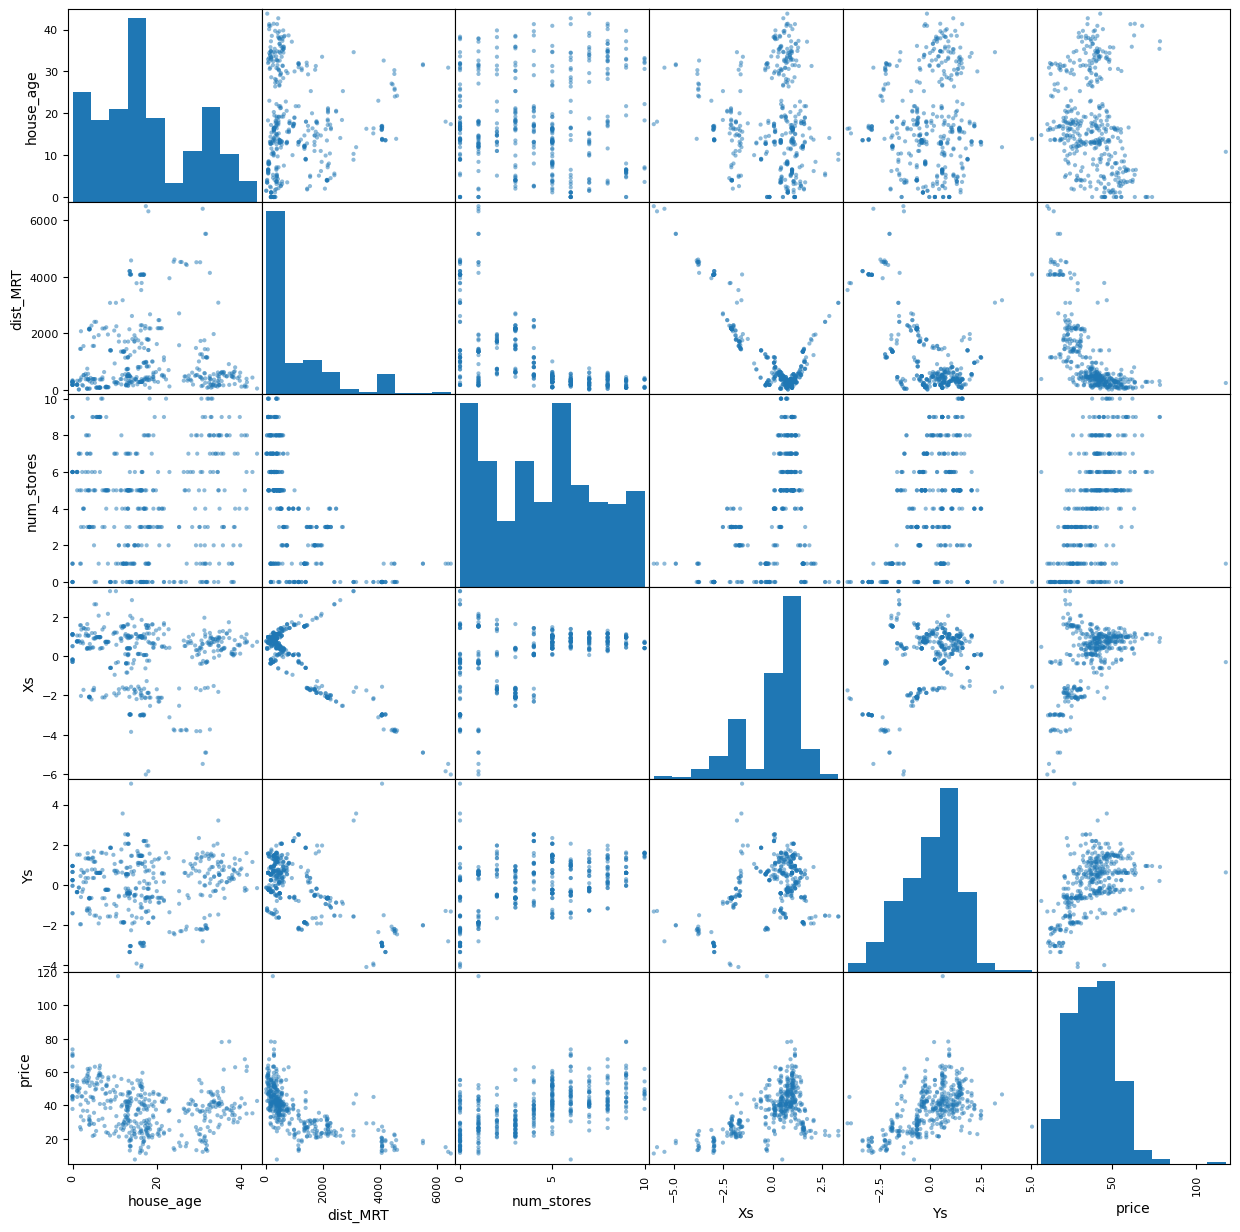

In [4]:
pd.plotting.scatter_matrix(re2.loc[:, ['house_age', 'dist_MRT', 'num_stores', 'Xs', 'Ys', 'price']], figsize=(15, 15));

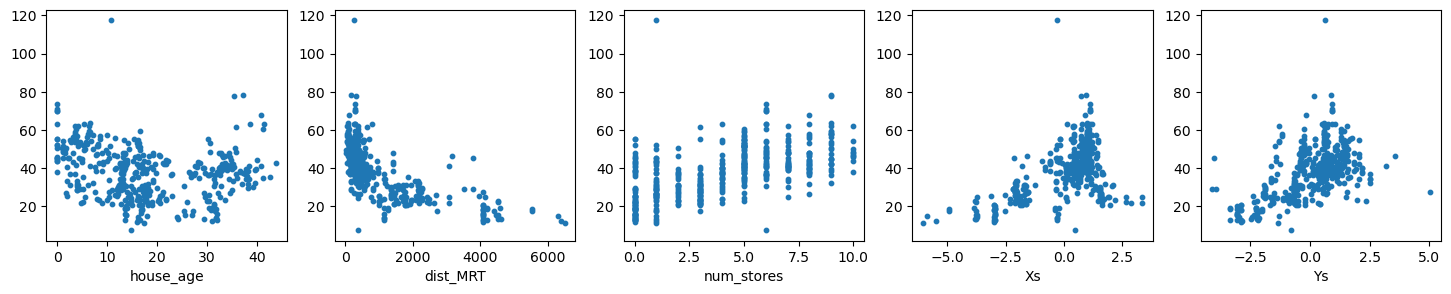

In [5]:
cols = ['house_age', 'dist_MRT', 'num_stores', 'Xs', 'Ys']
plt.figure(figsize=(18,3))
for i in np.arange(0,5):
    plt.subplot(1, 5, i+1)
    plt.scatter(re2[cols[i]], re2.price, s=10)
    plt.xlabel(cols[i])

<a id='intro'></a>
# 2. Introduction to Regression
<a href=#top>(back to top)</a>

## Model Definition

A linear regression model relates a dependent variable ($y$) to several independent variables through an equation of the form:

$$ y_i = \beta_0 + \beta_1 x_{1,i} + \beta_2 x_{2,i} + \cdots + \beta_{p-1} x_{p-1,i} + \epsilon_i $$

The $y$ and $x$ are observed, but the $\beta$'s and the $\epsilon$'s are not. The index $i$ refers to a particular observation. Let us assume we have $n$ observations.

## Parameter Estimation

To estimate the $\beta$ values, we minimise a cost function. One of the most commonly used ones is the least squares objective function:

$$
\sum_{i=1}^n (y_i - \beta_0 - \beta_1 x_{1,i} - \beta_2 x_{2,i} - \ldots \beta_{p-1} x_{p-1,i})^2
$$

We denote the optimal estimates as $\hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{p-1}$. 

## Residuals

Once we have the $\hat{\beta}$'s, we can compute **fitted values** by applying the equation back to the observed $x$ values. We can then compute **residuals**. There will be $n$ residuals, one for each observation that we have. We are going to use the residuals to help improve our model fit.

$$
\hat{y_i} =  \hat{\beta}_0 + \hat{\beta}_1 x_{1,i} + \hat{\beta}_2 x_{2,i} +
\cdots + \hat{\beta}_{p-1} x_{p-1,i}
$$ 

Residuals are defined to be 
$$
r_i = y_i - \hat{y_i}
$$

Here is what me mean, in a **simple** linear regression setting. The red values are the fitted values.

<img src="../figs/residuals-1.png" style="width: 600px;"/>

<a id='resid'></a>
# 3. Residual Analysis
<a href=#top>(back to top)</a>

## Influential Points

Some points in our dataset will influence the coefficients, and thus fitted values, and thus the residuals more than others. We need to identify these and study them, because we do not want our model driven by these chance occurences or wild points. Typically, influential points have one or both these properties:

1. They may be far away from their neighbours in the predictor space.
2. They may have an unduly large residual.

### On Coefficients

To see if point $i$ is influential on coefficient $j$, we 

* Estimate the model coefficients with all the data points.
* Leave out the observations $(x_i, y_i)$ one at a time and re-estimate the model coefficients.
* Compare the $\beta_j$'s ($n$ of them) from step 2 with the original estimate from step 1.  

<img src="../figs/inf_coef-1.png" style="width: 450px;"/>

### On Fitted Values

To assess the influence of each point on the fitted values, we use Cook's Distance, which is given by this formula:

$$
D_i = \frac{\sum_{j=1}^n (\hat{y}_j - \hat{y}_{j,-i})^2}{p s^2}$$

where 
*   $\hat{y}_{j,-i}$ is the fitted value for $y_j$ using the model that is fitted without observation $i$.
* $p$ is the number of predictors, including the intercept. In the diagrams above, we are considering only one predictor $x$ for the response variable $y$, and thus call it "simple" as opposed to "multiple" linear regression. Hence $p=2$.
* $s^2$ is a measure of the variance of $\epsilon$; it is computed as
$$ 
  s^2 = \frac{1}{n-p} \sum_{i=1}^n r_i^2
$$

We typically set aside and investigate the 3 - 4 most influential points at each iteration of our analysis.

## Residual Plots

We plot residuals against
* fitted values.
* explanatory variables one at a time.


<img src="../figs/residual_patterns-1.png" style="width: 800px;"/>

## Other Residual Plots

Other plots that could (and should) be made are
* Residuals against time order of data collection.
* Residuals against new variables to be considered for addition into the model.
* Residuals against a product of existing variables to check for interaction.
* QQ plots

<img src="../figs/qq_ex_1-1.png" style="width: 800px;"/>


## Assessing Model Fit

We can compute the $R^2$ of a model to assess how well it explains the variability in the observed values.

$$ 
R^2 = 1 - \frac{\sum_{i=1}^n r^2_i}{\sum_{i=1}^n (y_i - \bar{y})^2}
$$

A value close to 1 is better than a value close to 0. However, the $R^2$ can be misleading since it can be artificially increased by adding more predictors. Hence we usually look at the adjusted $R^2$, which penalises a model for using too many explanatory variables.

$$ \text{adjusted } R^2 = 1 - \frac{\frac{1}{n-1-p}\sum_{i=1}^n
r^2_i}{\frac{1}{n-1}\sum_{i=1}^n (y_i - \bar{y})^2}$$

Another statistic I tend to compute is the Predictive Residual Sum of Squares. It yields some indication of how well the model can generalise.

  $$ \sum_{i=1}^n (\hat{y}_{-i} - y_i)^2 $$
  
To get this quantity back to the scale of the original \(y\)-variable, we compute the root mean squared prediction error: 
$$ 
  \text{RMSPE} = \sqrt{\frac{1}{n}\sum_{i=1}^n (\hat{y}_{-i} - y_i)^2}
$$


<a id='simple'></a>
# 4. A Simple Model
<a href=#top>(back to top)</a>

Let's begin with a simple model:
$$
\text{price} = \beta_0 + \beta_1 \text{age} + \beta_2 \text{dist} + 
\beta_3 \text{(num. of stores)}  + \beta_4 \text{X}_s + \beta_5 \text{Y}_s + \epsilon
$$

Note that $p=6$ in this case.

In [38]:
import statsmodels.api as sm
import statsmodels.stats.outliers_influence as oinf

In [7]:
X = re2[['house_age', 'dist_MRT', 'num_stores', 'Xs', 'Ys']]
y = re2.price

In [8]:
X = sm.add_constant(X)

In [24]:
# Ordinary Least Square
s_model = sm.OLS(y, X) 

In [10]:
s_results = s_model.fit()

In [11]:
s_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     108.7
Date:                Fri, 13 Oct 2023   Prob (F-statistic):           9.32e-73
Time:                        17:06:28   Log-Likelihood:                -1492.4
No. Observations:                 414   AIC:                             2997.
Df Residuals:                     408   BIC:                             3021.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.5990      1.490     28.598      0.000      39.671      45.527
house_age     -0.2689      0.039     -6.896      0.000      -0.346      -0.192
dist_MRT      -0.0043      0.001     -5.889      0.000      -0.006      -0.003
num_stores     1.1630      0.190      6.114      0.000       0.789       1.537
Xs            -0.0861      0.487     -0.177      0.860      -1.043       0.870
Ys             2.1463      0.406      5.286      0.000       1.348       2.944
==============================================================================
Omnibus:                      240.066   Durbin-Watson:                   2.149
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3748.662
Skew:                           2.129   Prob(JB):                         0.00
Kurtosis:                      17.113   Cond. No.                     5.70e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The adjusted $R^2$ is approximately 0.57, but there is a warning about high condition number and numerical instability. If we look at the coefficients, the MRT distance is very small yet highly significant. The scale of the MRT distance is too large compared to the rest. This is probably causing the matrix inversion to be unstable. Additionally, the coefficient for the X-variable does not seem to be significant.

In [25]:
from sklearn.linear_model import LinearRegression
X1 = re2[['house_age', 'dist_MRT', 'num_stores', 'Xs', 'Ys']]
y = re2.price
reg = LinearRegression().fit(X1, y)
print(reg.intercept_, reg.coef_)

42.59902454128252 [-0.26891833 -0.00425975  1.16298109 -0.08613768  2.14631852]


In [26]:
# analyze outliners
s_results_inf = s_results.get_influence()
# externally studentized residuals
r_star = s_results_inf.get_resid_studentized_external()

In [14]:
RMSPE = np.sqrt((s_results_inf.resid_press**2).mean())

RMSPE

9.037761468971635

Here is a panel of residual plots. Take a close look at them, and identify which points you should investigate further.

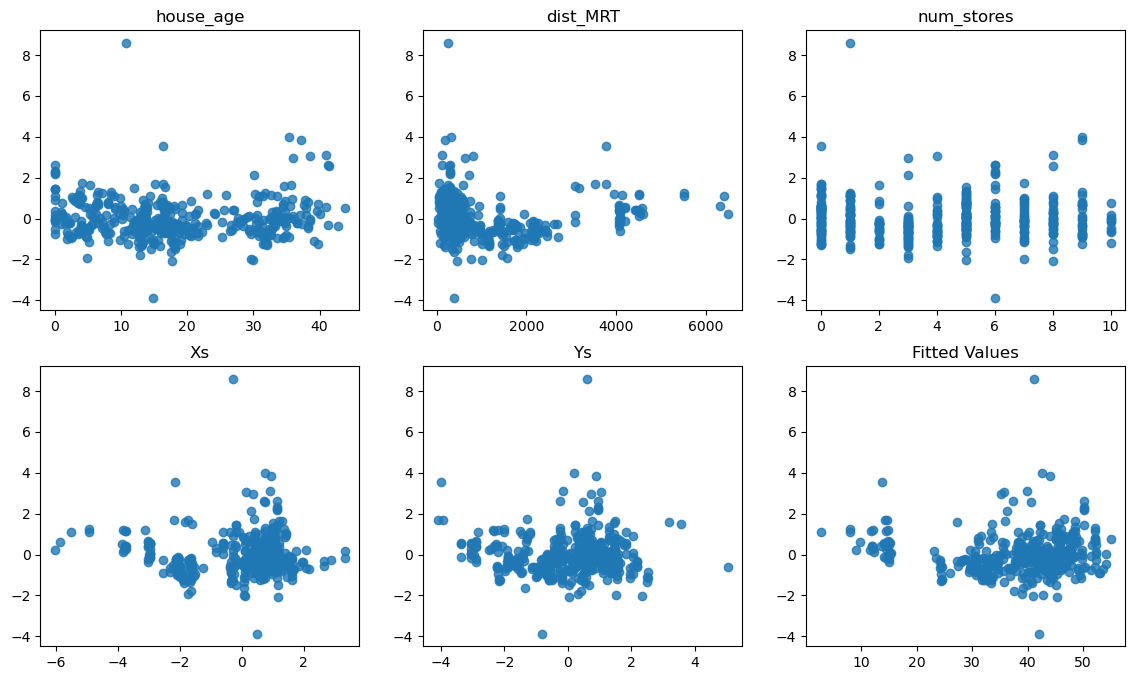

In [33]:
f, axs = plt.subplots(2, 3, squeeze=False, figsize=(14,8))

for i,cc in enumerate(X.columns[1:]):
    plt.subplot(2,3, i+1)
    plt.scatter(X[cc], r_star, alpha=0.8)
    plt.title(cc)

plt.subplot(236)
plt.scatter(s_results.fittedvalues, r_star, alpha=0.8)
plt.title('Fitted Values');

Now here are the differences in beta coefficient values, along with the Cook's distance plot. There is one point that is very influential. Isolate this point.

In [16]:
s_results_inf.dfbetas[:5, :].round(3)

array([[ 0.077, -0.064, -0.022, -0.103,  0.004, -0.027],
       [ 0.029, -0.   , -0.017, -0.059, -0.001, -0.018],
       [ 0.   , -0.001,  0.003, -0.   ,  0.002,  0.005],
       [ 0.003, -0.021,  0.041, -0.003,  0.035,  0.074],
       [-0.019,  0.03 , -0.006,  0.   , -0.008, -0.02 ]])

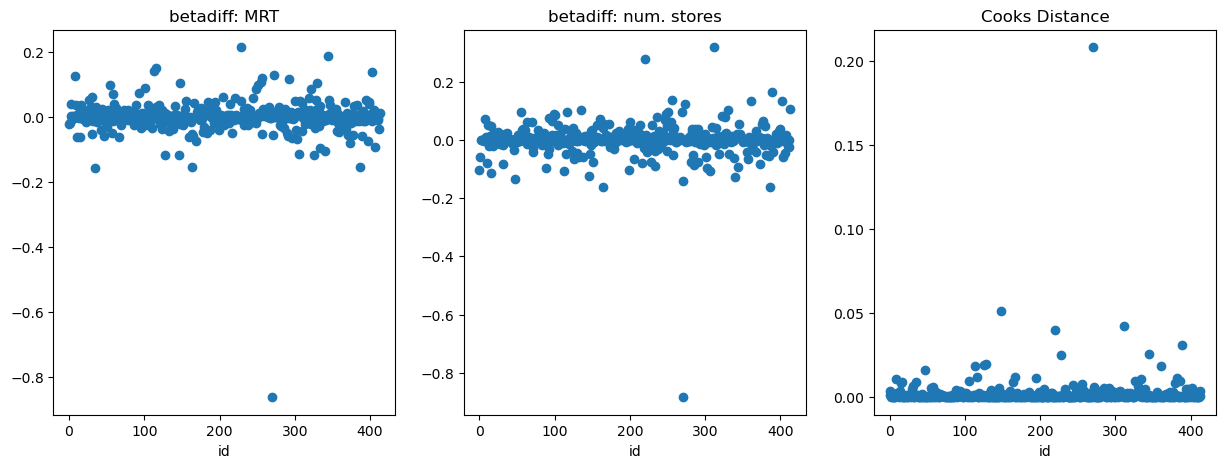

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.scatter(np.arange(414), s_results_inf.dfbetas[:,2]);plt.title('betadiff: MRT');plt.xlabel('id');
plt.subplot(132)
plt.scatter(np.arange(414), s_results_inf.dfbetas[:,3]);plt.title('betadiff: num. stores');plt.xlabel('id');
plt.subplot(133)
plt.scatter(np.arange(414), s_results_inf.cooks_distance[0]);plt.title('Cooks Distance');plt.xlabel('id');

In [18]:
np.where(s_results_inf.cooks_distance[0] == np.max(s_results_inf.cooks_distance[0]))

(array([270], dtype=int64),)

In [19]:
re2.loc[[270]]

,id,trans_date,house_age,dist_MRT,num_stores,lat,long,price,X,Y,Xs,Ys
270,271,2013.333333,10.8,252.5822,1,24.9746,121.53046,117.5,303556.1283,2763068.896,-0.295265,0.615713


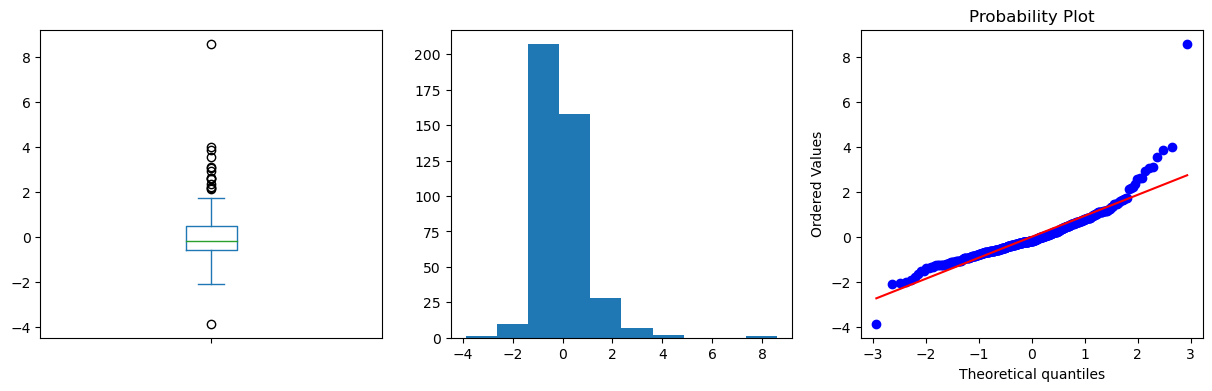

In [20]:
from myscripts.inference import check_normality as cn

cn(pd.Series(r_star))
#oinf.variance_inflation_factor(X.iloc[:,1:].to_numpy(), 1)

Here are some of the things we can try to remedy:

1. distance should be transformed.
2. There is still a little remaining curvature in age.
3. There is one outlier that is also influential (on fits and on the coefficients).
4. Xs is not significant.
5. Is the residuals vs. fitted indicating right-skewness?

<a id='improvement'></a>
# 5. An Improvement
<a href=#top>(back to top)</a>

Let's try two things first, to see if we can improve the adjusted $R^2$: take a log transform of the distance, and drop the influential point (point number 271).

In [21]:
X2 = re2.loc[:, ['house_age', 'num_stores', 'Xs', 'Ys']]
X2.loc[:, 'ldist'] = np.log(X.dist_MRT)

In [22]:
y2 = y.drop(270)
X2 = X2.drop(index=270)

X2 = sm.add_constant(X2)

In [23]:
s2_model = sm.OLS(y2, X2)
s2_results = s2_model.fit()
s2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     171.1
Date:                Fri, 13 Oct 2023   Prob (F-statistic):           1.12e-97
Time:                        17:06:31   Log-Likelihood:                -1412.6
No. Observations:                 413   AIC:                             2837.
Df Residuals:                     407   BIC:                             2861.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         75.9892      3.880     19.584      0.000      68.361      83.617
house_age     -0.2263      0.033     -6.933      0.000      -0.290      -0.162
num_stores     0.6330      0.177      3.578      0.000       0.285       0.981
Xs             0.3556      0.317      1.123      0.262      -0.267       0.978
Ys             2.5404      0.312      8.147      0.000       1.927       3.153
ldist         -5.7528      0.539    -10.674      0.000      -6.812      -4.693
==============================================================================
Omnibus:                      103.399   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              429.339
Skew:                           1.037   Prob(JB):                     5.89e-94
Kurtosis:                       7.544   Cond. No.                         236.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The warning about numerical instability disappears, the coefficient for distance is significant and the adjusted $R^2$ has gone up. Take some time to do the following, and compare it to the earlier model:

1. Residual plots
2. RMSPE statistic

Are we doing better?

<a id='ref'></a>
# 6. References
<a href=#top>(back to top)</a>

1. [statsmodels API](https://www.statsmodels.org/dev/examples/notebooks/generated/ols.html#examples-notebooks-generated-ols--page-root) The documentation is not as good as sklearn, but still decent.
2. Applied Regression Analysis, by Draper and Smith.